# Python Statistics Tutorial

## BSGP 7030 Summer 2024

### Importing necessary libraries 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np 
import scipy as sc
import os
import urllib 


# 3.1.1. Data representation and interaction

## Creating dataframes: reading data files or converting arrays

### Reading the brain size csv file and noting the seperation values and missing data values

In [5]:
brain_size = pd.read_csv('brain_size.csv', sep=';',na_values=".")

### Viewing the data frame

In [6]:
brain_size

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466


### Creating numpy arrays to be exposed as a pandas dataframe

In [7]:
t = np.linspace(-6, 6, 20)
sin_t = np.sin(t)
cos_t = np.cos(t)

### Making pandas data frame from numpy arrays

In [8]:
pd.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t})

,t,sin,cos
0,-6.000000,0.279415,0.960170
1,-5.368421,0.792419,0.609977
2,-4.736842,0.999701,0.024451
3,-4.105263,0.821291,-0.570509
4,-3.473684,0.326021,-0.945363
5,-2.842105,-0.295030,-0.955488
6,-2.210526,-0.802257,-0.596979
7,-1.578947,-0.999967,-0.008151
8,-0.947368,-0.811882,0.583822
9,-0.315789,-0.310567,0.950551


## Manipulating data

### Viewing the number of rows and columns the dataframe, identifying the specific columns, printing the gender column of the dataframe, and selecting the mean value in the gender column specfically for the female group.

In [9]:
brain_size.shape

(40, 8)

In [10]:
brain_size.columns

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

In [11]:
print(brain_size['Gender'])

0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object


In [12]:
brain_size[brain_size['Gender'] == 'Female']['VIQ'].mean()

print(brain_size[brain_size['Gender'] == 'Female']['VIQ'].mean())

109.45


### describing the float data in the brain_size dataframe

In [13]:
pd.DataFrame.describe(brain_size)

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,20.500000,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,11.690452,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,1.000000,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,10.750000,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,20.500000,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,30.250000,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,40.000000,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


### Using the groupby operation to split a dataframe on values of categorical variables

In [14]:
groupby_gender = brain_size.groupby('Gender')

In [15]:
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', np.float64(109.45))
('Male', np.float64(115.25))


### Using the groupby_gender object to look at the mean value (by gender) of all of the columns with float values

In [16]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


## Plotting Data

### Using Pandas plotting tools to display statistics of the data in dataframes

#### Scatter matrix of Weight, Height, MRI_Count

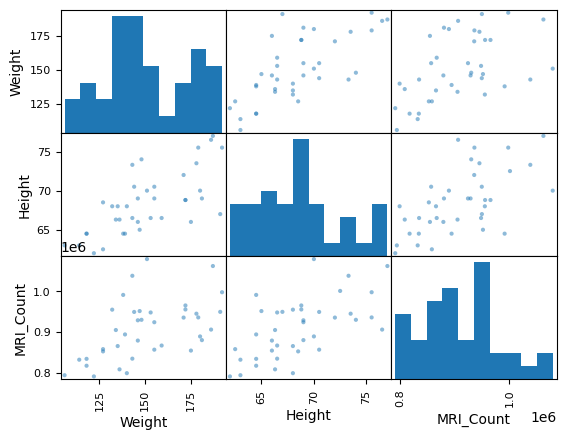

In [17]:
pd.plotting.scatter_matrix(brain_size[['Weight', 'Height', 'MRI_Count']])

plt.show()

#### Scatter matrix of PIQ, VIQ, FSIQ

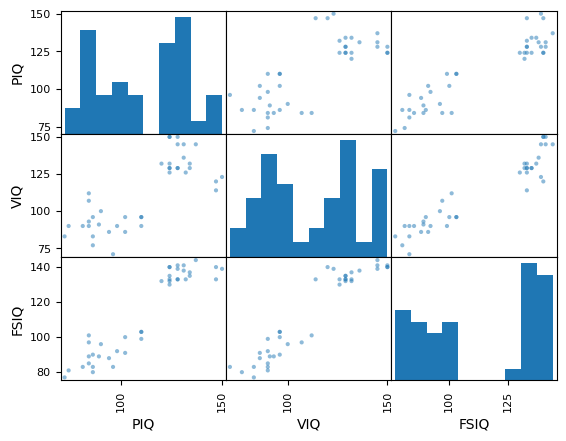

In [18]:
pd.plotting.scatter_matrix(brain_size[['PIQ', 'VIQ', 'FSIQ']])

plt.show()

# 3.1.2. Hypothesis testing: comparing two groups

## 3.1.2.1. Student’s t-test: the simplest statistical test

### 1-sample t-test: testing the value of a population mean

#### Running a 1 sample t-test with scipy

In [19]:
sc.stats.ttest_1samp(brain_size['VIQ'], 0)

TtestResult(statistic=np.float64(30.08809997084933), pvalue=np.float64(1.3289196468727879e-28), df=np.int64(39))

### 2-sample t-test: testing for difference across populations

#### Running a 2 sample t-test with scipy : First by creating variables selecting the VIQ data by gender, then performing the test

In [20]:
female_viq = brain_size[brain_size['Gender'] == 'Female']['VIQ']
male_viq = brain_size[brain_size['Gender'] == 'Male']['VIQ']
sc.stats.ttest_ind(female_viq, male_viq)  

TtestResult(statistic=np.float64(-0.7726161723275012), pvalue=np.float64(0.44452876778583217), df=np.float64(38.0))

### 3.1.2.2. Paired tests: repeated measurements on the same individuals

#### Since PIQ, VIQ, and FSIQ give 3 measures of IQ. We are going to test if FISQ and PIQ are significantly different. We can use a 2 sample test: but we run into an issue...

In [21]:
sc.stats.ttest_ind(brain_size['FSIQ'], brain_size['PIQ'])

TtestResult(statistic=np.float64(0.465637596380964), pvalue=np.float64(0.6427725009414841), df=np.float64(78.0))

####  The issue is that the test does consider that there are links between observations: FSIQ and PIQ are measured on the same individuals. Thus the variance due to inter-subject variability is confounding, and can be removed. We can do so by using a “paired test”, or “repeated measures test”:

In [22]:
sc.stats.ttest_rel(brain_size['FSIQ'], brain_size['PIQ'])

TtestResult(statistic=np.float64(1.7842019405859857), pvalue=np.float64(0.08217263818364236), df=np.int64(39))

#### An Equivalent test is a 1-sample test on the difference

In [23]:
sc.stats.ttest_1samp(brain_size['FSIQ'] - brain_size['PIQ'], 0)

TtestResult(statistic=np.float64(1.7842019405859857), pvalue=np.float64(0.08217263818364236), df=np.int64(39))

#### Using a Wilcoxon signed-rank test to relax the assumption of gaussian errors

In [24]:
sc.stats.wilcoxon(brain_size['FSIQ'], brain_size['PIQ']) 

WilcoxonResult(statistic=np.float64(274.5), pvalue=np.float64(0.10659492713506856))

# 3.1.3. Linear models, multiple factors, and analysis of variance

## 3.1.3.1. “formulas” to specify statistical models in Python

## A simple linear regression

### Given two set of observations, x and y, we want to test the hypothesis that y is a linear function of x.  

> y = x * coef + intercept + e

### We are going to fit a linear model by using ordinary least squares (OLS) and testing if the coef is a non zero.

#### Setting up the numpy arrays and the distributed noise

In [25]:
x = np.linspace(-5, 5, 20)
np.random.seed(1)
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)

#### Creating the Pandas Data frame, specifying a OLS model and fitting it

In [26]:
data = pd.DataFrame({'x': x, 'y': y})

In [27]:
model = smf.ols("y ~ x", data).fit()

### Inspecting the various statistics derived from the fit:

In [28]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           8.56e-08
Time:                        18:30:09   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

## Categorical variables: comparing groups or multiple categories

### Writing a comparison between IQ of male and female using a linear model

In [29]:
model = smf.ols("VIQ ~ Gender + 1", brain_size).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Thu, 11 Jul 2024   Prob (F-statistic):              0.445
Time:                        18:30:09   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

### Forcing a categorical 

####  The ‘Gender’ is automatically detected as a categorical variable, and thus each of its different values are treated as different entities.

#### An integer column can be forced to be treated as categorical using the code below

In [30]:
model = smf.ols('VIQ ~ C(Gender)', brain_size).fit()

#### An intercept can be removed by using - 1 in the formula, or force the use of an intercept using + 1. 

### Link to t-tests between different FSIQ and PIQ

#### Comparing different types of IQ, by creating a “long-form” table, listing IQs, where the type of IQ is indicated by a categorical variable:

#### Creating two data frames: 1 for the FSIQ , and the other for PIQ. Concatenating the two data frames and printing the new concatenated data frame

In [31]:
data_fisq = pd.DataFrame({'iq': brain_size['FSIQ'], 'type': 'fsiq'})
data_piq = pd.DataFrame({'iq': brain_size['PIQ'], 'type': 'piq'})
data_long = pd.concat((data_fisq, data_piq))
print(data_long) 

     iq  type
0   133  fsiq
1   140  fsiq
2   139  fsiq
3   133  fsiq
4   137  fsiq
..  ...   ...
35  128   piq
36  124   piq
37   94   piq
38   74   piq
39   89   piq

[80 rows x 2 columns]


#### Comparing the two IQ types with Linear Modeling

In [32]:
model = smf.ols("iq ~ type", data_long).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     iq   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2168
Date:                Thu, 11 Jul 2024   Prob (F-statistic):              0.643
Time:                        18:30:11   Log-Likelihood:                -364.35
No. Observations:                  80   AIC:                             732.7
Df Residuals:                      78   BIC:                             737.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     113.4500      3.683     30.807      

# 3.1.3.2. Multiple Regression: including multiple factors

## Consider a linear model explaining a variable z (the dependent variable) with 2 variables x and y:

>z = xc_1 + yc_2 + i + e 

## Such a model can be seen in 3D as fitting a plane to a cloud of (x, y, z) points.

### Importing Iris csv file

In [33]:
data = pd.read_csv('iris.csv')

#### Comparing the the sepal size and petal length using Multiple Regression Modeling 

In [34]:
model = smf.ols('sepal_width ~ name + petal_length', data).fit()
print(model.summary())  

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           1.58e-20
Time:                        18:30:13   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

# 3.1.3.3. Post-hoc hypothesis testing: analysis of variance (ANOVA)

### In the iris example, we wanted to test if the petal length is different between versicolor and virginica, after removing the effect of sepal width. 

### We can do so by testing the difference between the coefficient associated to versicolor and virginica in the linear model we created.  (it is an Analysis of Variance, ANOVA)

### For this, we write a vector of ‘contrast’ on the parameters estimated: we want to test "name[T.versicolor] - name[T.virginica]", with an F-test:

In [35]:
print(model.f_test([0, 1, -1, 0]))

<F test: F=3.245335346574177, p=0.07369058781701142, df_denom=146, df_num=1>


# 3.1.4. More visualization: seaborn for statistical exploration

### Importing the Data from the Determinants of Wages from the 1985 Current Population Survey

#### Downloading the file if it does not exist in the directory and Giving the columns names

In [36]:
if not os.path.exists('wages.txt'):
    urllib.request.urlretrieve('http://lib.stat.cmu.edu/datasets/CPS_85_Wages',
                       'wages.txt')


names = [
    'EDUCATION: Number of years of education',
    'SOUTH: 1=Person lives in South, 0=Person lives elsewhere',
    'SEX: 1=Female, 0=Male',
    'EXPERIENCE: Number of years of work experience',
    'UNION: 1=Union member, 0=Not union member',
    'WAGE: Wage (dollars per hour)',
    'AGE: years',
    'RACE: 1=Other, 2=Hispanic, 3=White',
    'OCCUPATION: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other',
    'SECTOR: 0=Other, 1=Manufacturing, 2=Construction',
    'MARR: 0=Unmarried,  1=Married',
]

short_names = [n.split(':')[0] for n in names]



### Reading the wage.txt file we created as a CSV

In [37]:
data = pd.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None, header=None, engine='python')

data.columns = short_names

#### Log-transform the wages, because they typically are increased with multiplicative factors

In [38]:
data['WAGE'] = np.log10(data['WAGE'])

#### Printing the Wage.txt data

In [39]:
print(data)

     EDUCATION  SOUTH  SEX  EXPERIENCE  UNION      WAGE  AGE  RACE  \
0            8      0    1          21      0  0.707570   35     2   
1            9      0    1          42      0  0.694605   57     3   
2           12      0    0           1      0  0.824126   19     3   
3           12      0    0           4      0  0.602060   22     3   
4           12      0    0          17      0  0.875061   35     3   
..         ...    ...  ...         ...    ...       ...  ...   ...   
529         18      0    0           5      0  1.055378   29     3   
530         12      0    1          33      0  0.785330   51     1   
531         17      0    1          25      1  1.366423   48     1   
532         12      1    0          13      1  1.298416   31     3   
533         16      0    0          33      0  1.186956   55     3   

     OCCUPATION  SECTOR  MARR  
0             6       1     1  
1             6       1     1  
2             6       1     0  
3             6       0     0  

# 3.1.4.1. Pairplot: scatter matrices

### Creating a Pair plot of the Wage, Age, and Education Columns

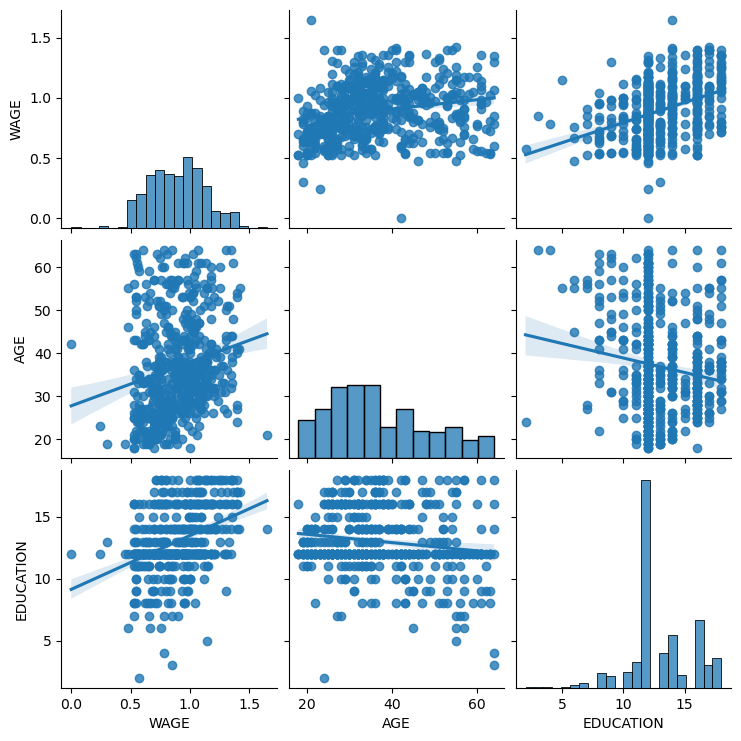

In [40]:
sns.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'], kind='reg');  


In [41]:
### Plotting the Categorical as the hue: I.E making hue equal to the SEX column

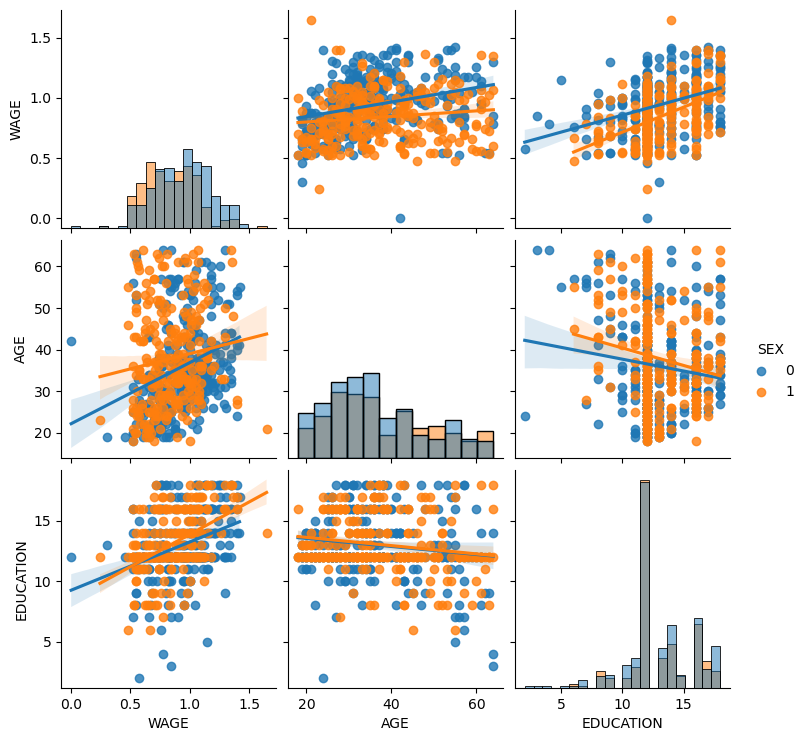

In [42]:
sns.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'], kind='reg', diag_kind='hist', hue='SEX'); 


### To make the figures look similar to Matplotlib figures use the code below. Place it it right after you import your libraries

> plt.rcdefaults()

# 3.1.4.2. lmplot: plotting a univariate regression

### To plot a regression capturing the relation between one variable and another, in this case wage and eduction, use the following code

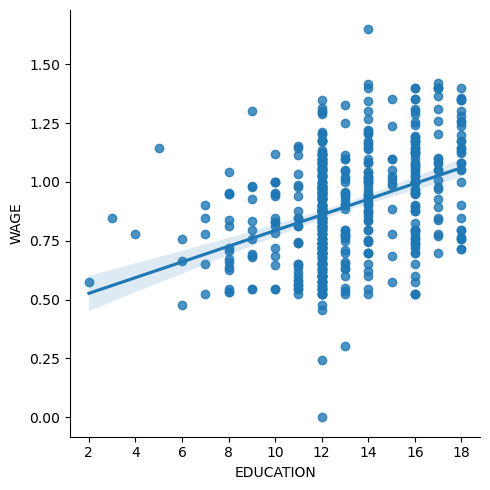

In [44]:
sns.lmplot(y='WAGE', x='EDUCATION', data=data); 

### To compute a regression that is less sensitive to outliers, one must use a robust model.

> This is done in seaborn using robust=True in the plotting functions, or in statsmodels by replacing the use of the OLS by a “Robust Linear Model”, statsmodels.formula.api.rlm().

In [ ]:
### An example of the plot before using robust=True is shown below

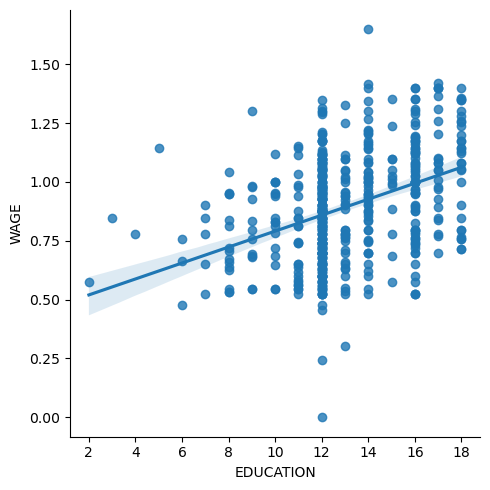

In [48]:
sns.lmplot(y='WAGE', x='EDUCATION', data=data, robust=True); 

# 3.1.5. Testing for interactions

## Do wages increase more with education for males than females?

### We can address this by formulating a single model that tests for a variance of slope across the two populations. This is done via an “interaction”.

In [54]:
result = smf.ols(formula='WAGE ~ EDUCATION + SEX + EDUCATION * SEX',
                data=data).fit() 
print(result.summary()) 

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     43.72
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           2.94e-25
Time:                        18:49:24   Log-Likelihood:                 88.503
No. Observations:                 534   AIC:                            -169.0
Df Residuals:                     530   BIC:                            -151.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.5748      0.058      9.861